In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import requests
from pprint import pprint
import json

base_url = "http://api.erg.ic.ac.uk/AirQuality" 
#url = /Hourly/MonitoringIndex/SiteCode={SITECODE}/Json"
url = f"{base_url}/Information/Groups/Json"

print(url)

#"http://api.erg.ic.ac.uk/AirQuality/Daily/MonitoringIndex/GroupName={GROUPNAME}/Date={DATE}/Json"

r = requests.get(url = url)
# r.url

data = r.json()
print(data)



http://api.erg.ic.ac.uk/AirQuality/Information/Groups/Json
{'Groups': {'Group': [{'@GroupName': 'All', '@Description': 'All current network LAs', '@WebsiteURL': 'http://www.erg.kcl.ac.uk/'}, {'@GroupName': 'AroundLondon', '@Description': 'Selection of boroughs around London', '@WebsiteURL': 'http://www.londonair.org.uk/'}, {'@GroupName': 'CambridgeCity', '@Description': 'Demo group for tender', '@WebsiteURL': ''}, {'@GroupName': 'Cambridgeshire', '@Description': 'Demo group for tender', '@WebsiteURL': ''}, {'@GroupName': 'Essex', '@Description': 'All 14 councils in Essex', '@WebsiteURL': 'http://www.essexair.org.uk/'}, {'@GroupName': 'Hampshire', '@Description': 'Various local authorities in Hampshire', '@WebsiteURL': 'http://www.hantsair.org.uk/'}, {'@GroupName': 'Leicester', '@Description': 'Leicester Council', '@WebsiteURL': 'http://www.leicester.gov.uk/'}, {'@GroupName': 'London', '@Description': 'All currently active boroughs of London', '@WebsiteURL': 'http://www.londonair.org.uk

In [3]:
import urllib

In [4]:
urllib.parse.urlencode({"Date":"2023-06-14 00:00:00"})

'Date=2023-06-14+00%3A00%3A00'

In [5]:
help(urllib.request)

Help on module urllib.request in urllib:

NAME
    urllib.request - An extensible library for opening URLs using a variety of protocols

MODULE REFERENCE
    https://docs.python.org/3.10/library/urllib.request.html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    The simplest way to use this module is to call the urlopen function,
    which accepts a string containing a URL or a Request object (described
    below).  It opens the URL and returns the results as file-like
    object; the returned object has some extra methods described below.
    
    The OpenerDirector manages a collection of Handler objects that do
    all the actual work.  Each Handler implements a particular protocol or
    optio

In [9]:
import csv
import pandas as pd
location="London"
url = base_url + f"/Information/MonitoringLocalAuthority/GroupName={location}/Json"
print(url)
r = requests.get(url = url) 
r.raise_for_status()
data = r.json()
ourdata=[]
csvheaders=["ID", "Authority", "Latitude", "Longitude"]

for key, value in data['LocalAuthorities'].items():
    for d in value:
        boroughs= [d['@LocalAuthorityCode'], d['@LocalAuthorityName'],d['@LaCentreLatitude'], d['@LaCentreLongitude']] 
        ourdata.append(boroughs)

FILEPATH = r"C:\Temp\london_air_quality.csv"

with open (FILEPATH, "w", encoding = "UTF8", newline = "") as file:
    writer = csv.writer(file)
    writer.writerow(csvheaders)
    writer.writerows(ourdata)

print("done!")
        

http://api.erg.ic.ac.uk/AirQuality/Information/MonitoringLocalAuthority/GroupName=London/Json
done!


In [10]:
data2 = pd.read_csv(r"C:\Temp\london_air_quality.csv")
data2

,ID,Authority,Latitude,Longitude
0,1,Barking and Dagenham,51.538435,0.114670
1,2,Barnet,51.652929,-0.199606
2,3,Bexley,51.441355,0.148610
3,4,Brent,51.552255,-0.302620
4,5,Bromley,51.405683,0.014350
5,6,Camden,51.551706,-0.158825
6,7,City of London,51.513330,-0.088947
7,8,Croydon,51.372361,-0.100401
8,9,Ealing,51.513351,-0.304214
9,10,Enfield,51.652096,-0.081533


In [11]:
#daily AQI readings for London 

#url = base_url + "/Daily/MonitoringIndex/Latest/GroupName={GroupName}/Json"
#date=urllib.parse.urlencode({"Date":"2023-06-14"})
#date="2023-06-14"
#Daily/MonitoringIndex/GroupName={location}/Date={date}/Json"
#url = base_url + f"/Daily/MonitoringIndex/Latest/GroupName={location}/Json"
#PARAMS = {"GroupName":"AroundLondon","Date":"2023-06-14 00:00:00"}
#print(data)
#print(type(data))

location = "London"
import urllib
#urllib.parse.urlencode({"Date":"2023-06-15 00:00:00"})
date=urllib.parse.urlencode({"Date":"2023-06-15"})
#date="2023-06-15"
#date=date
url = base_url + f"/Daily/MonitoringIndex/Latest/GroupName={location}/Json"

print(url)
r = requests.get(url = url) 
r.raise_for_status()
data = r.json()
pprint(data)



http://api.erg.ic.ac.uk/AirQuality/Daily/MonitoringIndex/Latest/GroupName=London/Json
{'DailyAirQualityIndex': {'@GroupName': 'London',
                          '@MonitoringIndexDate': '2023-06-19 00:00:00',
                          '@TimeToLive': '22',
                          'LocalAuthority': [{'@LaCentreLatitude': '51.538435',
                                              '@LaCentreLatitudeWGS84': '6717095.01808',
                                              '@LaCentreLongitude': '0.11467',
                                              '@LaCentreLongitudeWGS84': '12765.0060093',
                                              '@LocalAuthorityCode': '1',
                                              '@LocalAuthorityName': 'Barking '
                                                                     'and '
                                                                     'Dagenham',
                                              'Site': [{'@BulletinDate': '2023-06-19 '
        

In [12]:
type({'a':1}) == dict

True

In [13]:
#AQI for sites around london

ddata = []
csvheaders = ["Date", "Authority Name", "AQI", "Pollutant Description", "Pollutant", "Site Name", "Site Code", "Site Type", "Latitude", "Longitude"]

for key, value in data['DailyAirQualityIndex'].items():
    for d in data['DailyAirQualityIndex']['LocalAuthority']:
       # print(d['@LocalAuthorityName'])
        #print(d.keys())
        if 'Site' in d:
            items = d['Site']
            if type(items) == dict:
                #print('isdict')
                items = [items]
            #print(d['Site'])
            
            for item in items:
                sitename = item['@SiteName']
                date = item['@BulletinDate']
                lat = item['@Latitude']
                long = item['@Longitude']
                sitetype = item['@SiteType']
                sitecode = item['@SiteCode']
                
                if "Species" in item:
                    #print(d['Site']['Species'])
                    species = item['Species']
                    
                    if type(species) == dict:
                        species = [species]
                        
                        
                    for specie in species:
                        if "@AirQualityIndex" in specie:
                            dailyaqidata = [date, d['@LocalAuthorityName'], specie['@AirQualityIndex'], specie['@SpeciesDescription'], specie['@SpeciesCode'], sitename, sitecode, sitetype, lat, long]
                            ddata.append(dailyaqidata)

print(ddata)

FILEPATH = r"C:\Temp\daily_london_air_quality.csv"

with open(FILEPATH, "w", encoding = "UTF8", newline = "") as file:
    writer = csv.writer(file)
    writer.writerow(csvheaders)
    writer.writerows(ddata)                     
        

[['2023-06-19 00:00:00', 'Barking and Dagenham', '1', 'Sulphur Dioxide', 'SO2', 'Barking and Dagenham - Rush Green', 'BG1', 'Suburban', '51.563752', '0.177891'], ['2023-06-19 00:00:00', 'Barking and Dagenham', '1', 'Nitrogen Dioxide', 'NO2', 'Barking and Dagenham - Scrattons Farm', 'BG2', 'Suburban', '51.529389', '0.132857'], ['2023-06-19 00:00:00', 'Barking and Dagenham', '3', 'PM10 Particulate', 'PM10', 'Barking and Dagenham - Scrattons Farm', 'BG2', 'Suburban', '51.529389', '0.132857'], ['2023-06-19 00:00:00', 'Bexley', '1', 'Nitrogen Dioxide', 'NO2', 'Bexley - Belvedere West', 'BQ7', 'Urban Background', '51.4946486813055', '0.137279111232178'], ['2023-06-19 00:00:00', 'Bexley', '3', 'Ozone', 'O3', 'Bexley - Belvedere West', 'BQ7', 'Urban Background', '51.4946486813055', '0.137279111232178'], ['2023-06-19 00:00:00', 'Bexley', '1', 'PM10 Particulate', 'PM10', 'Bexley - Belvedere West', 'BQ7', 'Urban Background', '51.4946486813055', '0.137279111232178'], ['2023-06-19 00:00:00', 'Bexle

In [14]:
import pandas as pd

dailyaqi = pd.read_csv(r"C:\Temp\daily_london_air_quality.csv", sep=',')
dailyaqi


,Date,Authority Name,AQI,Pollutant Description,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
0,2023-06-19 00:00:00,Barking and Dagenham,1,Sulphur Dioxide,SO2,Barking and Dagenham - Rush Green,BG1,Suburban,51.563752,0.177891
1,2023-06-19 00:00:00,Barking and Dagenham,1,Nitrogen Dioxide,NO2,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.529389,0.132857
2,2023-06-19 00:00:00,Barking and Dagenham,3,PM10 Particulate,PM10,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.529389,0.132857
3,2023-06-19 00:00:00,Bexley,1,Nitrogen Dioxide,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.494649,0.137279
4,2023-06-19 00:00:00,Bexley,3,Ozone,O3,Bexley - Belvedere West,BQ7,Urban Background,51.494649,0.137279
...,...,...,...,...,...,...,...,...,...,...
683,2023-06-19 00:00:00,Westminster,1,Sulphur Dioxide,SO2,Westminster - Marylebone Road,MY1,Kerbside,51.522540,-0.154590
684,2023-06-19 00:00:00,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Strand (Northbank BID),NB1,Roadside,51.511970,-0.116713
685,2023-06-19 00:00:00,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Covent Garden,WM5,Urban Background,51.511977,-0.121627
686,2023-06-19 00:00:00,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Elizabeth Bridge,WMD,Roadside,51.492248,-0.147115


In [15]:
#data description
dailyaqi.dtypes

Date                      object
Authority Name            object
AQI                        int64
Pollutant Description     object
Pollutant                 object
Site Name                 object
Site Code                 object
Site Type                 object
Latitude                 float64
Longitude                float64
dtype: object

In [16]:
dailyaqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   688 non-null    object 
 1   Authority Name         688 non-null    object 
 2   AQI                    688 non-null    int64  
 3   Pollutant Description  688 non-null    object 
 4   Pollutant              688 non-null    object 
 5   Site Name              688 non-null    object 
 6   Site Code              688 non-null    object 
 7   Site Type              688 non-null    object 
 8   Latitude               688 non-null    float64
 9   Longitude              688 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 53.9+ KB


In [17]:
#change date to datetime type

dailyaqi['Date'] = pd.to_datetime(dailyaqi['Date'])


In [18]:
# round up longitude and latitude columns 

dailyaqi['Latitude'] = dailyaqi['Latitude'].round(2)
dailyaqi['Longitude'] = dailyaqi['Longitude'].round(2)

In [19]:
dailyaqi.dtypes

Date                     datetime64[ns]
Authority Name                   object
AQI                               int64
Pollutant Description            object
Pollutant                        object
Site Name                        object
Site Code                        object
Site Type                        object
Latitude                        float64
Longitude                       float64
dtype: object

In [20]:
dailyaqi.shape

(688, 10)

In [21]:
dailyaqi.describe()

,Date,AQI,Latitude,Longitude
count,688,688.00000,688.000000,688.000000
mean,2023-06-19 00:00:00,1.25000,51.489767,-0.060407
min,2023-06-19 00:00:00,1.00000,51.360000,-0.300000
25%,2023-06-19 00:00:00,1.00000,51.460000,-0.140000
50%,2023-06-19 00:00:00,1.00000,51.490000,-0.080000
75%,2023-06-19 00:00:00,1.00000,51.520000,0.020000
max,2023-06-19 00:00:00,3.00000,51.670000,0.210000
std,NaN,0.53003,0.052300,0.130948


In [22]:
#clean data

#missing values 
print("missing vals (%) per field:\n", 100*dailyaqi.isnull().mean())

missing vals (%) per field:
 Date                     0.0
Authority Name           0.0
AQI                      0.0
Pollutant Description    0.0
Pollutant                0.0
Site Name                0.0
Site Code                0.0
Site Type                0.0
Latitude                 0.0
Longitude                0.0
dtype: float64


In [23]:
#duplicate data 

#non-numeric cols 

non_numeric_cols = list(dailyaqi.select_dtypes(exclude=('int', 'float')).columns)

non_numeric_cols



['Date',
 'Authority Name',
 'Pollutant Description',
 'Pollutant',
 'Site Name',
 'Site Code',
 'Site Type']

In [24]:
print("duplication overall: ", 100*(len(dailyaqi)-len(dailyaqi.drop_duplicates()))/len(dailyaqi),
      "%\nduplication in site name: ", 100*(len(dailyaqi["Site Name"])-len(dailyaqi["Site Name"].drop_duplicates()))/len(dailyaqi["Site Name"]), "%")

sites = dailyaqi['Site Name'].sort_values().unique()
#print(sites)

duplication overall:  75.1453488372093 %
duplication in site name:  87.5 %


In [177]:
dailyaqi = dailyaqi.drop_duplicates()
dailyaqi

,index,Date,Authority Name,AQI,Pollutant Description,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
0,0,2023-06-19,Barking and Dagenham,1,Sulphur Dioxide,SO2,Barking and Dagenham - Rush Green,BG1,Suburban,51.56,0.18
1,1,2023-06-19,Barking and Dagenham,1,Nitrogen Dioxide,NO2,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
2,2,2023-06-19,Barking and Dagenham,3,PM10 Particulate,PM10,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
3,3,2023-06-19,Bexley,1,Nitrogen Dioxide,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
4,4,2023-06-19,Bexley,3,Ozone,O3,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
...,...,...,...,...,...,...,...,...,...,...,...
166,167,2023-06-19,Westminster,1,Sulphur Dioxide,SO2,Westminster - Marylebone Road,MY1,Kerbside,51.52,-0.15
167,168,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Strand (Northbank BID),NB1,Roadside,51.51,-0.12
168,169,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Covent Garden,WM5,Urban Background,51.51,-0.12
169,170,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Elizabeth Bridge,WMD,Roadside,51.49,-0.15


In [26]:
#data for Bexley 
dailyaqi.columns

bexdata = dailyaqi.loc[(dailyaqi['Site Name']=="Bexley - Belvedere West")]
bexdata

,Date,Authority Name,AQI,Pollutant Description,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
3,2023-06-19,Bexley,1,Nitrogen Dioxide,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
4,2023-06-19,Bexley,3,Ozone,O3,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
5,2023-06-19,Bexley,1,PM10 Particulate,PM10,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
7,2023-06-19,Bexley,1,PM2.5 Particulate,PM25,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14


In [42]:
import plotly as py 
import plotly.express as px 
import plotly.graph_objs as go

fig = px.bar(dailyaqi, x = "Pollutant", y = "AQI", color = "Authority Name", title = "Daily AQI for pollutants in sites around London")
fig.show()

In [179]:
dailyaqi

,index,Date,Authority Name,AQI,Pollutant Description,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
0,0,2023-06-19,Barking and Dagenham,1,Sulphur Dioxide,SO2,Barking and Dagenham - Rush Green,BG1,Suburban,51.56,0.18
1,1,2023-06-19,Barking and Dagenham,1,Nitrogen Dioxide,NO2,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
2,2,2023-06-19,Barking and Dagenham,3,PM10 Particulate,PM10,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
3,3,2023-06-19,Bexley,1,Nitrogen Dioxide,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
4,4,2023-06-19,Bexley,3,Ozone,O3,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
...,...,...,...,...,...,...,...,...,...,...,...
166,167,2023-06-19,Westminster,1,Sulphur Dioxide,SO2,Westminster - Marylebone Road,MY1,Kerbside,51.52,-0.15
167,168,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Strand (Northbank BID),NB1,Roadside,51.51,-0.12
168,169,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Covent Garden,WM5,Urban Background,51.51,-0.12
169,170,2023-06-19,Westminster,1,Nitrogen Dioxide,NO2,Westminster - Elizabeth Bridge,WMD,Roadside,51.49,-0.15


In [183]:
pollutantaqi = dailyaqi.pivot(columns = "Pollutant", values = "AQI").reset_index()
pollutantaqi

Pollutant,index,NO2,O3,PM10,PM25,SO2
0,0,NaN,NaN,NaN,NaN,1.0
1,1,1.0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,3.0,NaN,NaN
3,3,1.0,NaN,NaN,NaN,NaN
4,4,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...
166,166,NaN,NaN,NaN,NaN,1.0
167,167,1.0,NaN,NaN,NaN,NaN
168,168,1.0,NaN,NaN,NaN,NaN
169,169,1.0,NaN,NaN,NaN,NaN


In [28]:
dailyaqi.head()

,Date,Authority Name,AQI,Pollutant Description,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
0,2023-06-19,Barking and Dagenham,1,Sulphur Dioxide,SO2,Barking and Dagenham - Rush Green,BG1,Suburban,51.56,0.18
1,2023-06-19,Barking and Dagenham,1,Nitrogen Dioxide,NO2,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
2,2023-06-19,Barking and Dagenham,3,PM10 Particulate,PM10,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
3,2023-06-19,Bexley,1,Nitrogen Dioxide,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
4,2023-06-19,Bexley,3,Ozone,O3,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14


In [29]:
dailyaqi.dtypes

Date                     datetime64[ns]
Authority Name                   object
AQI                               int64
Pollutant Description            object
Pollutant                        object
Site Name                        object
Site Code                        object
Site Type                        object
Latitude                        float64
Longitude                       float64
dtype: object

In [30]:
dailyaqi['Pollutant Description'].astype(str)

0        Sulphur Dioxide
1       Nitrogen Dioxide
2       PM10 Particulate
3       Nitrogen Dioxide
4                  Ozone
             ...        
167      Sulphur Dioxide
168     Nitrogen Dioxide
169     Nitrogen Dioxide
170     Nitrogen Dioxide
171    PM2.5 Particulate
Name: Pollutant Description, Length: 171, dtype: object

In [31]:
smalldf = dailyaqi.drop(columns=["Pollutant Description"])
smalldf

,Date,Authority Name,AQI,Pollutant,Site Name,Site Code,Site Type,Latitude,Longitude
0,2023-06-19,Barking and Dagenham,1,SO2,Barking and Dagenham - Rush Green,BG1,Suburban,51.56,0.18
1,2023-06-19,Barking and Dagenham,1,NO2,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
2,2023-06-19,Barking and Dagenham,3,PM10,Barking and Dagenham - Scrattons Farm,BG2,Suburban,51.53,0.13
3,2023-06-19,Bexley,1,NO2,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
4,2023-06-19,Bexley,3,O3,Bexley - Belvedere West,BQ7,Urban Background,51.49,0.14
...,...,...,...,...,...,...,...,...,...
167,2023-06-19,Westminster,1,SO2,Westminster - Marylebone Road,MY1,Kerbside,51.52,-0.15
168,2023-06-19,Westminster,1,NO2,Westminster - Strand (Northbank BID),NB1,Roadside,51.51,-0.12
169,2023-06-19,Westminster,1,NO2,Westminster - Covent Garden,WM5,Urban Background,51.51,-0.12
170,2023-06-19,Westminster,1,NO2,Westminster - Elizabeth Bridge,WMD,Roadside,51.49,-0.15


In [32]:
data2

,ID,Authority,Latitude,Longitude
0,1,Barking and Dagenham,51.538435,0.114670
1,2,Barnet,51.652929,-0.199606
2,3,Bexley,51.441355,0.148610
3,4,Brent,51.552255,-0.302620
4,5,Bromley,51.405683,0.014350
5,6,Camden,51.551706,-0.158825
6,7,City of London,51.513330,-0.088947
7,8,Croydon,51.372361,-0.100401
8,9,Ealing,51.513351,-0.304214
9,10,Enfield,51.652096,-0.081533


In [33]:
data2 = data2.rename(columns = {'Authority': 'Authority Name'})
data2.head()

,ID,Authority Name,Latitude,Longitude
0,1,Barking and Dagenham,51.538435,0.114670
1,2,Barnet,51.652929,-0.199606
2,3,Bexley,51.441355,0.148610
3,4,Brent,51.552255,-0.302620
4,5,Bromley,51.405683,0.014350


In [34]:
avgaqi=smalldf.groupby("Authority Name")["AQI"].mean().round(2).reset_index()
avgaqi

,Authority Name,AQI
0,Barking and Dagenham,1.67
1,Bexley,1.33
2,Brent,1.44
3,Bromley,1.00
4,City of London,1.33
5,Croydon,1.00
6,Ealing,1.50
7,Enfield,1.00
8,Greenwich,1.17
9,Harrow,1.00


In [99]:
geodf = pd.merge(data2, avgaqi)
geodf

,ID,Authority Name,Latitude,Longitude,AQI
0,1,Barking and Dagenham,51.538435,0.114670,1.67
1,3,Bexley,51.441355,0.148610,1.33
2,4,Brent,51.552255,-0.302620,1.44
3,5,Bromley,51.405683,0.014350,1.00
4,7,City of London,51.513330,-0.088947,1.33
5,8,Croydon,51.372361,-0.100401,1.00
6,9,Ealing,51.513351,-0.304214,1.50
7,10,Enfield,51.652096,-0.081533,1.00
8,11,Greenwich,51.478790,-0.010677,1.17
9,15,Harrow,51.578809,-0.333760,1.00


In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt
f1 = r"C:\Users\Krupa\Downloads\statistical-gis-boundaries-london (1)\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(f1)
#1 = pd.read_csv(f1)
map_df.head()

#"C:\Users\Krupa\Downloads\statistical-gis-boundaries-london (1)\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp"

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18..."


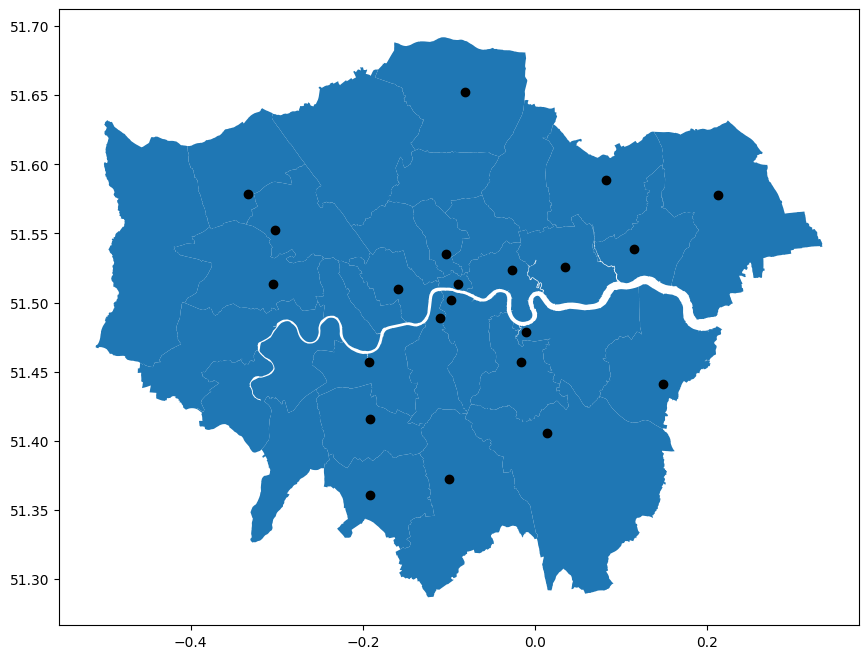

In [149]:
map_df.to_crs(epsg=4326).plot(figsize=(15,8))
x= merged['Longitude']
y= merged['Latitude']
plt.scatter(x= x, y= y, c="black")
#authorities = [merged['NAME']]

#for authorityname in authorities:
   # print(authorityname)
 #   plt.text(x+.03,y+.03, authorityname, fontsize=10)
    

<Axes: xlabel='Longitude', ylabel='Latitude'>

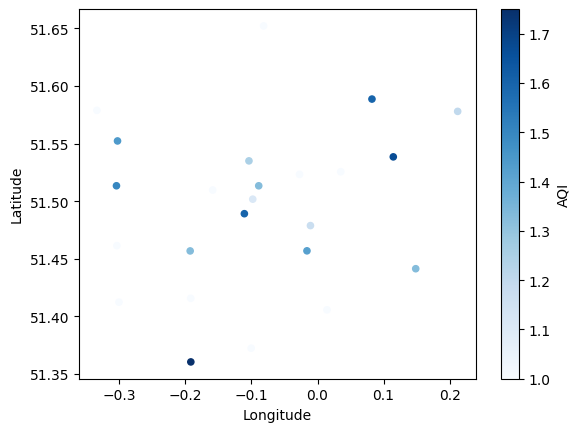

In [101]:
geodf.plot(x="Longitude", y ="Latitude", kind = "scatter", c = "AQI", colormap = "Blues")


<Axes: >

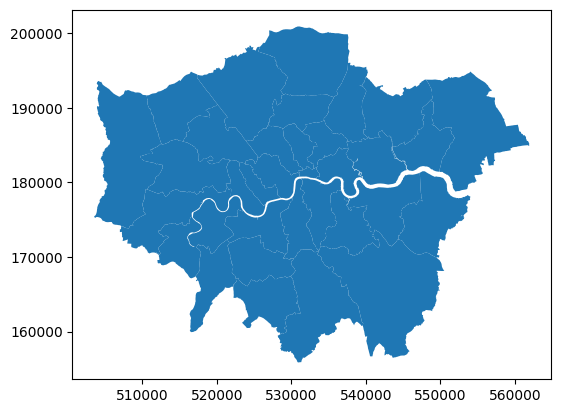

In [103]:
#plt.plot(map_df)
map_df.plot()


In [104]:
#join geo df with aqi df
merged = map_df.set_index("NAME").join(geodf.set_index("Authority Name")).reset_index()
merged

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,ID,Latitude,Longitude,AQI
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((516401.600 160201.800, 516407.300 16...",NaN,NaN,NaN,NaN
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((535009.200 159504.700, 535005.500 15...",8.0,51.372361,-0.100401,1.00
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((540373.600 157530.400, 540361.200 15...",5.0,51.405683,0.014350,1.00
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((521975.800 178100.000, 521967.700 17...",NaN,NaN,NaN,NaN
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((510253.500 182881.600, 510249.900 18...",9.0,51.513351,-0.304214,1.50
5,Havering,E09000016,11445.735,210.763,F,NaN,NaN,"POLYGON ((549893.900 181459.800, 549894.600 18...",16.0,51.577924,0.212083,1.20
6,Hillingdon,E09000017,11570.063,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510615.200 19...",NaN,NaN,NaN,NaN
7,Harrow,E09000015,5046.330,0.000,F,NaN,NaN,"POLYGON ((510599.800 191689.500, 510660.000 19...",15.0,51.578809,-0.333760,1.00
8,Brent,E09000005,4323.270,0.000,F,NaN,NaN,"POLYGON ((525201.000 182512.600, 525181.500 18...",4.0,51.552255,-0.302620,1.44
9,Barnet,E09000003,8674.837,0.000,F,NaN,NaN,"POLYGON ((524579.900 198355.200, 524594.300 19...",NaN,NaN,NaN,NaN


C:\Users\Krupa\AppData\Local\Temp\ipykernel_22520\3430641941.py:23: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



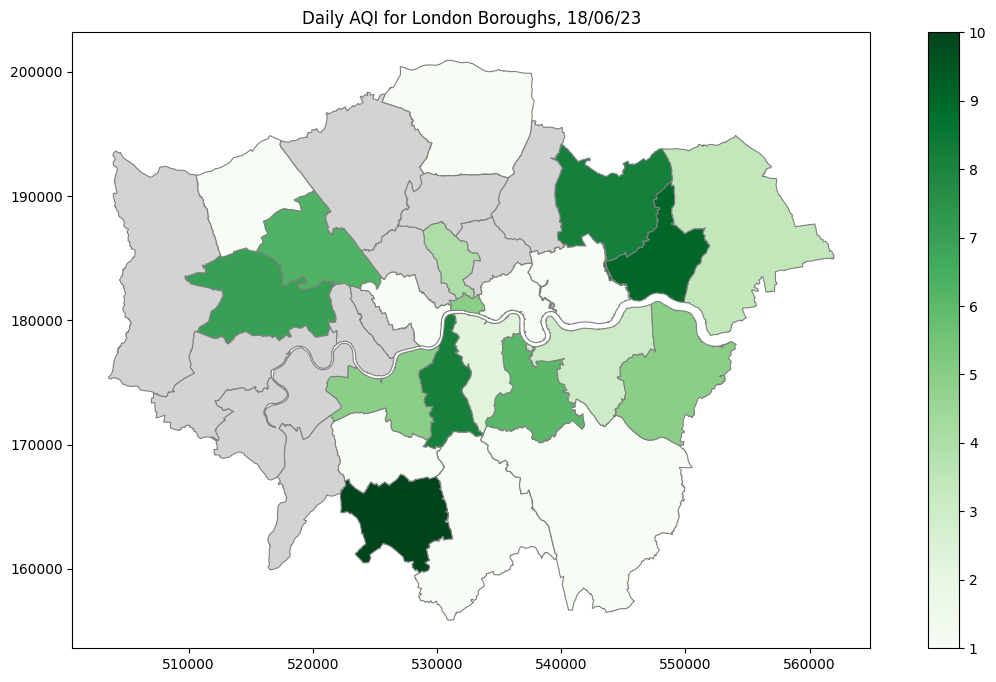

In [112]:
#set variable to call a column to visualise on map 
variable = "AQI"

#set range for choropleth
vmin, vmax = 1, 10

#create fig
fig, ax = plt.subplots(1, figsize=(15,8))
merged.plot(column = variable, cmap = "Greens", linewidth = 0.8, ax = ax, edgecolor = "grey", missing_kwds = {'color':'lightgrey'})
#plt.scatter(x = merged['Longitude'], y =  merged['Latitude'], c = "black")


#formatting
#ax.axis("off")
ax.set_title("Daily AQI for London Boroughs, 18/06/23")
#ax.grid(b=True, alpha = 0.5)
 
#create a scale for AQI 
sm = plt.cm.ScalarMappable(cmap="Greens", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)